# Projet 4 : Réaliser une étude de santé publique avec R ou Python

## **1. Introduction**

### **1.1 Importation des librairies**

In [8]:
# On importe les libraires

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Graphiques
import seaborn as sns # Graphiques

# Pour éviter d'avoir les messages warning
import warnings
warnings.filterwarnings('ignore')

### **1.2 Importation des données**

In [9]:
# Importation des données de la FAO : 4 fichiers excel au format CSV
df_sous_nut = pd.read_csv('sous_nutrition.csv')
df_pop = pd.read_csv('population.csv')
df_dispo_alim = pd.read_csv('dispo_alimentaire.csv')
df_aide_alim = pd.read_csv('aide_alimentaire.csv')

### 1.3 DataFrame 'sous_nutrition' et 'population'

#### 1.3.1 Apercu du fichier 'sous_nutrition'

In [4]:
# On regarde comment se compose le fichier

df_sous_nut.describe()

,Zone,Année,Valeur
count,1218,1218,624
unique,203,6,139
top,Afghanistan,2012-2014,<0.1
freq,6,203,120


#### 1.3.2 Modification de la colonne 'Année' pour le fichier sous nutrition 

In [5]:
# On modifie la periode par une seule année

df_sous_nut['Année'].replace(['2012-2014', '2013-2015','2014-2016','2015-2017','2016-2018','2017-2019'],['2013', '2014','2015','2016','2017','2018'],inplace=True)

#### 1.3.3 Remplacement de la donnée <0.1 par 0 sur le fichier sous nutrition.

In [6]:
# Remplacer la valeur <0.1 par 0
df_sous_nut['Valeur'] = df_sous_nut['Valeur'].replace('<0.1', 0)

# On verifie que toutes les valeurs ont bien été remplacés
df_sous_nut.describe()

,Zone,Année,Valeur
count,1218,1218,624
unique,203,6,139
top,Afghanistan,2013,0
freq,6,203,120


#### 1.3.4 Remplacer les données pour les pays ou les données en sous-nutrition sont manquantes par 0.

In [7]:
# On remplace les lignes ou la valeur pour les pays est NaN par 0
df_sous_nut['Valeur'] = df_sous_nut['Valeur'].fillna(0)

# On verifie que toutes les valeurs ont bien été remplacés
df_sous_nut.describe()

,Zone,Année,Valeur
count,1218,1218,1218
unique,203,6,139
top,Afghanistan,2013,0
freq,6,203,714


#### 1.3.5 Apercu du fichier population

In [8]:
df_pop.describe()

,Année,Valeur
count,1416.000000,1.416000e+03
mean,2015.500000,3.144793e+04
std,1.708428,1.300812e+05
min,2013.000000,7.930000e-01
25%,2014.000000,3.783410e+02
50%,2015.500000,5.126480e+03
75%,2017.000000,1.930666e+04
max,2018.000000,1.427648e+06


#### 1.3.6 Apercu du type de données dans le fichiers population

In [9]:
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


#### **1.3.7 Apercu du type de données dans le fichier sous nutrition

In [10]:
df_sous_nut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  1218 non-null   object
dtypes: object(3)
memory usage: 28.7+ KB


#### 1.3.8 Conversion de la colonne 'Valeur' en decimal à virgule sur le fichier sous nutrition

In [11]:
# On convertit la colonne'Valeur' en décimal.

df_sous_nut['Valeur'] = df_sous_nut['Valeur'].astype(float)

# **2. Les demandes de Marc**

## 2.1 La proportion de personnes en état de sous-nutrition


In [12]:
# On definit la population mondiale en 2017 en millards d'habitants
pop_mond_2017 = sum(df_pop.loc[df_pop['Année']==2017,'Valeur'])*1000

# On definit la population en état de sous nutrition en 2017 en millions d'habitants
sous_nut_2017 = sum(df_sous_nut.loc[df_pop['Année']==2017,'Valeur'])*1000000

# On calcule la proportion de personnes en état de sous_nutrition en 2017
prop_ssnut_2017 = (sous_nut_2017)/(pop_mond_2017)*100

# On arrondit le resultat
prop_ssnut_2017 = round(prop_ssnut_2017,2)

# On affiche le resultat
print ("En 2017 la population mondiale était de", pop_mond_2017/1000000000, "milliard d'habitants")
print ("En 2017 la population mondiale en état de sous nutrition était de", sous_nut_2017/1000000, "millions d'habitants")
print ("En 2017 la proportion de personnes en état de sous-nutrition est de",prop_ssnut_2017, "%" )


En 2017 la population mondiale était de 7.548134111000007 milliard d'habitants
En 2017 la population mondiale en état de sous nutrition était de 535.7 millions d'habitants
En 2017 la proportion de personnes en état de sous-nutrition est de 7.1 %


## **Graphique 1: La proportion de personnes en état de sous-nutrition**

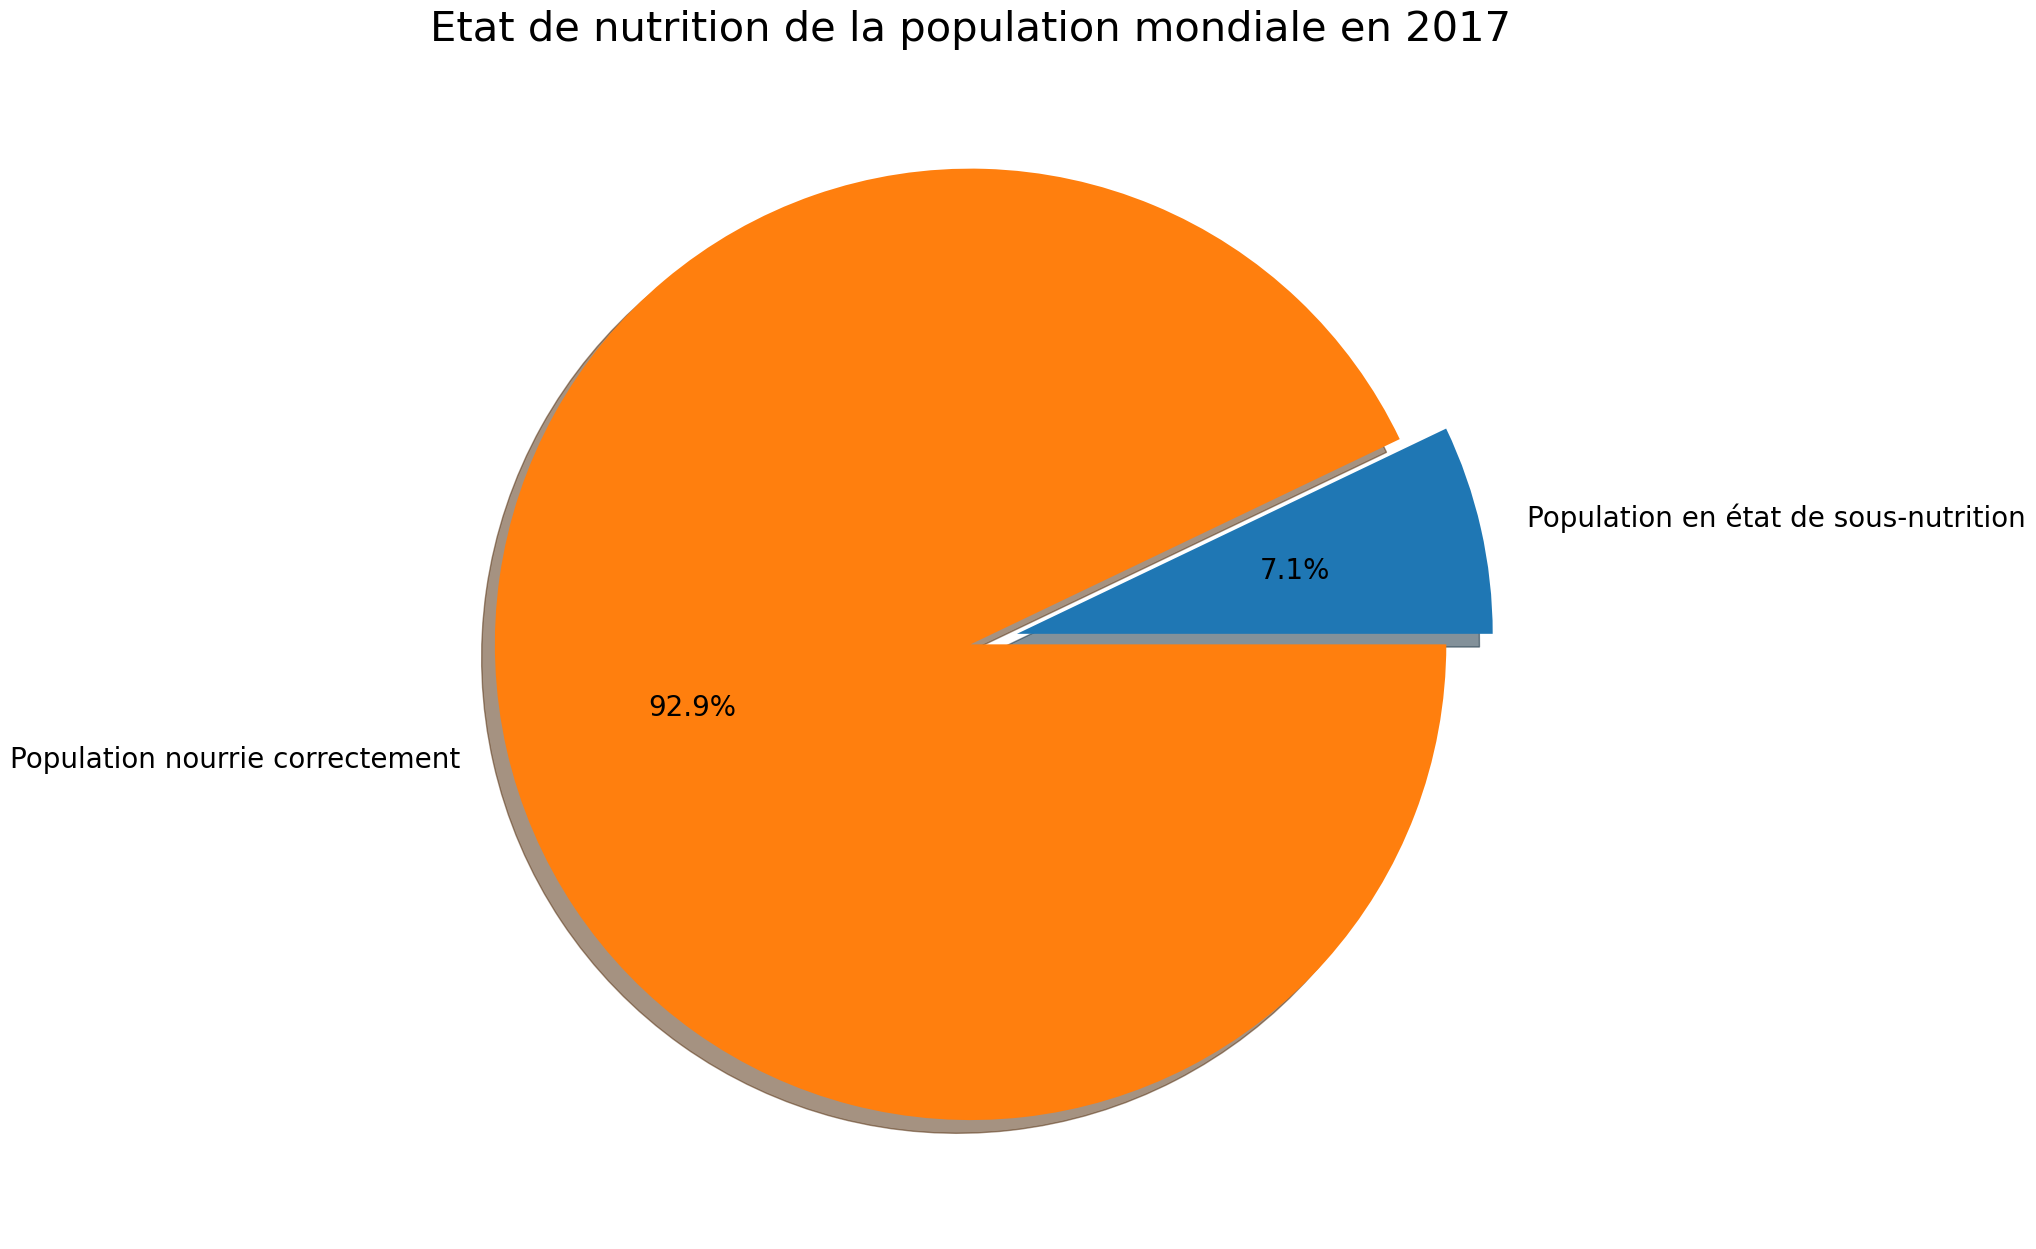

In [13]:
# On importe la librairies necessaires au graphiques.

import matplotlib.pyplot as plt

#On determine la taille du graphique et on paramètre ce dernier

plt.figure(figsize=(20,20))
labels = ["Population en état de sous-nutrition", "Population nourrie correctement"]
sizes = [prop_ssnut_2017, 100-prop_ssnut_2017]
explode = (0.1,0)
textprops = {"fontsize":20}
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', textprops=textprops, shadow=True)
plt.title("Etat de nutrition de la population mondiale en 2017", fontsize=30)
plt.tight_layout()
plt.savefig("Proportion_nutrition_totale.png", dpi=200, bbox_inches = 'tight')
plt.show()

##  2.2 :  Le nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité alimentaire mondiale.

### 2.2.1 Information sur besoin journalier

#### Le besoin journalier varie en fonction de plusieurs parametres (activité, zone géographique etc..) mais la moyenne est de 2400 calories par jour pour un etre humain ayant une activité dite "normale".
##### Source : Agence nationale de sécurité sanitaire de l'alimentation, de l'environnement et du travail (2022)


### 2.2.2 Jointure entre le fichier population et le fichier disponibilité alimentaire pour 2017 et création colonne disponibilité alimentaire pour chaque pays.

In [14]:
# On joint la population de 2017 et le DataFrame de la disponibilité alimentaire
pop_2017 = df_pop.loc[df_pop['Année']==2017]
df_dispo_alim = pd.merge(df_dispo_alim , pop_2017, how='left', on='Zone')

# On crée une colonne permettant de calculer la disponibilité alimentaire journalière pour la population de chaque pays
df_dispo_alim['Kcal/jour/population']=df_dispo_alim['Valeur']*df_dispo_alim['Disponibilité alimentaire (Kcal/personne/jour)']

### 2.2.3 Calcul du total de cette disponibilté en rapport avec la population dans le monde

In [15]:
# On fait la somme de cette colonne divisé par 2400 ce qui correspond au besoin journalier d'un adulte.
# On arrondit ce resultat et on le multiplie par 1000 pour obtenir un resultat en millions.
resultat = round(df_dispo_alim['Kcal/jour/population'].sum()/2400*1000)

# On affiche le resultat en divisant par 1 millards pour que ce soit plus lisible.
print("La disponibilité alimentaire mondiale permet de nourrir", resultat/1000000000, "milliards de personnes")

# On affiche la population théorique nourrie en milliard d'habitants
pop_theorique_nourrie = resultat/1000000000

# On calcule la population mondiale afin d'avoir le pourcentage qui pourrait etre nourrie.
pop_totale_2017 = pop_2017['Valeur'].sum()*1000/1000000000
print('la population mondiale en 2017 était de', pop_totale_2017, 'milliards de personnes')

# On fait le rapport entre la population théorique nourrie et la population mondiale
# On multiplie par 100 afin de connaitre ce pourcentage.
resultat_pourcentage = ((pop_theorique_nourrie)/(pop_totale_2017))*100

# On arrondit le resultat
resultat_pourcentage = round(resultat_pourcentage,2)
print('Théoriquement en 2017, nous pourrions nourrir', resultat_pourcentage , '% de la population')

La disponibilité alimentaire mondiale permet de nourrir 8.716243595 milliards de personnes
la population mondiale en 2017 était de 7.548134111000001 milliards de personnes
Théoriquement en 2017, nous pourrions nourrir 115.48 % de la population


### 2.2.4 Visuel graphique

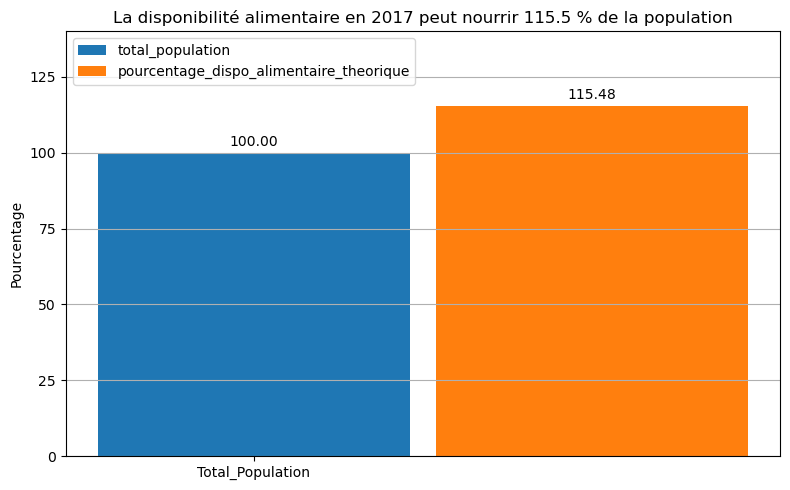

In [16]:
# On intègre les données pour chaque barre de l'histogramme.

pourcentage_theorique = [115.48]
total_population = [100]

#On regle et on affiche le Sub plot

fig, ax = plt.subplots()
index = np.arange(len(pourcentage_theorique))
bar_width = 0.35
bar1 = ax.bar(index, total_population, bar_width, label='total_population')
bar2 = ax.bar(index + bar_width + 0.03, pourcentage_theorique, bar_width, label='pourcentage_dispo_alimentaire_theorique')

plt.ylabel('Pourcentage')

plt.title('La disponibilité alimentaire en 2017 peut nourrir 115.5 % de la population')

plt.xticks(index, ['Total_Population'])
plt.ylim(0,140)
plt.yticks([0,25,50,75,100,125])
plt.grid(axis='y')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

plt.legend(loc='upper left')

fig.set_figheight(5)
fig.set_figwidth(8)
plt.tight_layout()
plt.show()


##  2.3 Le nombre théorique de personnes qui pourraient être nourries à partir de la disponibilité alimentaire végétale.

### 2.3.1 Jointure entre le fichier population et le fichier disponibilité alimentaire pour 2017 uniquement pour le végétale et création d'une colonne disponibilité alimentaire pour chaque pays.

In [19]:
# On joint la population de 2017 et le DataFrame de la disponibilité alimentaire
pop_2017 = df_pop.loc[df_pop['Année']==2017]
df_dispo_alim = pd.merge(df_dispo_alim , pop_2017, how='left', on='Zone')

# Sur ce fichier on ne selectionne que les ligne ou la provenance est d'origine végétale
df_dispo_alim_vegetale = df_dispo_alim.loc[df_dispo_alim['Origine']== 'vegetale']

# On crée une colonne permettant de calculer la disponibilité alimentaire végétale journalière pour la population de chaque pays
df_dispo_alim_vegetale['Kcal/jour/population']=df_dispo_alim_vegetale['Valeur']*df_dispo_alim_vegetale['Disponibilité alimentaire (Kcal/personne/jour)']

### 2.3.2 Calcul du total de cette disponibilté en rapport avec la population dans le monde.

In [20]:
# On fait la somme de cette colonne divisé par 2400 ce qui correspond au besoin journalier d'un adulte.
# On arrondit ce resultat et on le multiplie par 1000 pour obtenir un resultat en millions.
resultat = round(df_dispo_alim_vegetale['Kcal/jour/population'].sum() / 2400 * 1000, 2)

# On affiche le resultat en divisant par 1 millards pour que ce soit plus lisible.
print("La disponibilité alimentaire mondiale en végétale permet de nourrir", round(resultat/1000000000, 2), "milliards de personnes")

# On affiche la population théorique nourrie en milliard d'habitants
pop_theorique_nourrie = resultat/1000000000

# On calcule la population mondiale afin d'avoir le pourcentage qui pourrait etre nourrie.
pop_totale_2017 = pop_2017['Valeur'].sum()*1000/1000000000
pop_totale_2017 = round(pop_totale_2017,2)
print('la population mondiale en 2017 était de', pop_totale_2017, 'milliards de personnes')

# On fait le rapport entre la population théorique nourrie et la population mondiale
# On multiplie par 100 afin de connaitre ce pourcentage.
resultat_pourcentage = ((pop_theorique_nourrie)/(pop_totale_2017))*100

# On arrondit le resultat
resultat_pourcentage = round(resultat_pourcentage,2)
print('Théoriquement en 2017, nous pourrions nourrir', resultat_pourcentage , '% de la population')

La disponibilité alimentaire mondiale en végétale permet de nourrir 7.19 milliards de personnes
la population mondiale en 2017 était de 7.55 milliards de personnes
Théoriquement en 2017, nous pourrions nourrir 95.26 % de la population


### 2.3.3 Visuel graphique

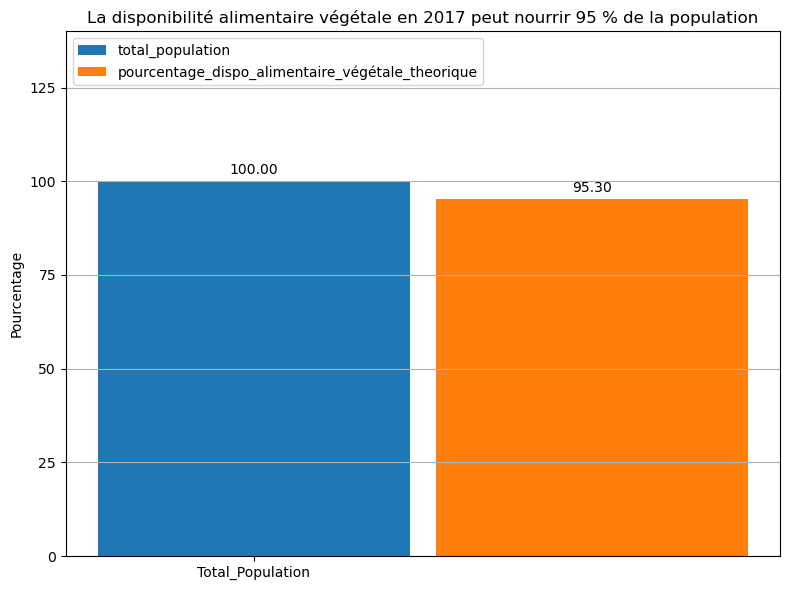

In [21]:
# On intègre les données pour chaque barre de l'histogramme.

pourcentage_theorique = [95.3]
total_population = [100]

#On regle et on affiche le Sub plot

fig, ax = plt.subplots()
index = np.arange(len(pourcentage_theorique))
bar_width = 0.35
bar1 = ax.bar(index, total_population, bar_width, label='total_population')
bar2 = ax.bar(index + bar_width + 0.03, pourcentage_theorique, bar_width, label='pourcentage_dispo_alimentaire_végétale_theorique')

plt.ylabel('Pourcentage')

plt.title('La disponibilité alimentaire végétale en 2017 peut nourrir 95 % de la population')

plt.xticks(index, ['Total_Population'])
plt.ylim(0,140)
plt.yticks([0,25,50,75,100,125])
plt.grid(axis='y')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)

plt.legend(loc='upper left')

fig.set_figheight(6)
fig.set_figwidth(8)
plt.tight_layout()
plt.show()

##  2.4 : L'utilisation de la disponibilité interieure

### 2.4.1 Lexique / Precisions
#### La colonne disponibilité interieure correspond à la disponibilité alimentaire.
#### La disponibilité alimentaire = Production + Importations - Exportations + Varations des stocks.
#### La colonne Nourriture correspond à la disponibilité pour l'alimentation humaine.
#### Disponibilité pour alimentation humaine = Disponibilité alimentaire - Alimentation animale - Autres Utilisations - semences - Pertes-  Traitements.

### 2.4.2 Apercu du fichier 'dispo alimentaire'

In [22]:
df_dispo_alim.describe()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,...,Semences,Traitement,Variation de stock,Année_x,Valeur_x,Kcal/jour/population,Année_y,Valeur_y,Année,Valeur
count,2720.000000,5496.000000,14241.000000,14015.000000,11794.000000,11561.000000,15382.000000,12226.000000,14852.000000,14015.000000,...,2091.000000,2292.000000,6776.000000,15416.0,1.541600e+04,1.407600e+04,15416.0,1.541600e+04,15416.0,1.541600e+04
mean,479.501838,157.391376,34.789832,8.719368,1.283111,1.223608,640.293460,110.596925,87.264543,347.931359,...,73.974653,961.905323,-15.407615,2017.0,4.448127e+04,1.486146e+06,2017.0,4.448127e+04,2017.0,4.448127e+04
std,4240.119637,5076.785816,107.287655,24.618223,3.680399,3.598686,9067.267153,1053.318990,717.372714,4475.704458,...,528.069224,10381.795904,549.834540,0.0,1.579860e+05,1.788087e+07,0.0,1.579860e+05,0.0,1.579860e+05
min,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,...,0.000000,-19.000000,-39863.000000,2017.0,5.204500e+01,-2.677557e+06,2017.0,5.204500e+01,2017.0,5.204500e+01
25%,0.000000,0.000000,0.000000,0.060000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2017.0,2.845414e+03,0.000000e+00,2017.0,2.845414e+03,2017.0,2.845414e+03
50%,4.000000,0.000000,4.000000,0.830000,0.080000,0.100000,7.000000,0.000000,2.000000,5.000000,...,2.000000,6.000000,0.000000,2017.0,9.729823e+03,2.106728e+04,2017.0,9.729823e+03,2017.0,9.729823e+03
75%,74.000000,4.000000,21.000000,5.190000,0.630000,0.660000,76.750000,9.000000,18.000000,52.000000,...,17.000000,69.000000,0.000000,2017.0,3.110465e+04,2.300196e+05,2017.0,3.110465e+04,2017.0,3.110465e+04
max,150000.000000,347309.000000,1711.000000,430.760000,60.760000,54.970000,739267.000000,42797.000000,63381.000000,426850.000000,...,17060.000000,326711.000000,5284.000000,2017.0,1.421022e+06,1.143923e+09,2017.0,1.421022e+06,2017.0,1.421022e+06


### 2.4.3 Apercu du type de données dans le fichier 'dispo alimentaire'

In [23]:
df_dispo_alim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15605 entries, 0 to 15604
Data columns (total 25 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

### 2.4.4 Calcul du total pour la disponibilité intérieure

In [24]:
#on calcule la somme de la disponibilité interieur 
total_dispo_interieur =df_dispo_alim['Disponibilité intérieure'].sum()

### 2.4.5 Calcul du total pour la disponibilité animale (Aliments pour animaux)

In [25]:
#On remplace les Nan de 'Alimentation pour animaux' par 0
df_dispo_alim['Aliments pour animaux'].fillna(0,inplace=True)

#on calcule la somme des aliments pour animaux 
total_alimentation_animale =df_dispo_alim['Aliments pour animaux'].sum()

### 2.4.6 Proportion de la disponibilité animale sur la disponibilité interieure

In [26]:
# On calcule le rapport entre la dispo animale et la dispo interieure multiplié par 100
Proportion_alim_animale = (total_alimentation_animale)/(total_dispo_interieur)*100

#On arrondit le resutat et on affiche le resultat
Proportion_alim_animale = round(Proportion_alim_animale,1)
print ("La propotion de l'alimentation animale represente",Proportion_alim_animale, "% de la disponibilité intérieure" )

La propotion de l'alimentation animale represente 13.2 % de la disponibilité intérieure


### 2.4.7 Calcul du total de l'alimentation perdu (Pertes) et proportion par rapport à la disponibilité interieure.

In [27]:
#On remplace les Nan de 'Pertes' par 0
df_dispo_alim['Pertes'].fillna(0,inplace=True)

#on calcule la somme des aliments pour les pertes 
total_pertes =df_dispo_alim['Pertes'].sum()

# On calcule le rapport entre les pertes et la dispo interieure multiplié par 100
Proportion_pertes = (total_pertes)/(total_dispo_interieur)*100

#On arrondit le resutat et on affiche le resultat
Proportion_pertes = round(Proportion_pertes,1)
print ("La propotion des pertes represente",Proportion_pertes, "% de la disponibilité intérieure" )

La propotion des pertes represente 4.6 % de la disponibilité intérieure


### 2.4.8 Calcul du total de l'alimentation humaine (Nourritures) et proportion par rapport à la disponibilité interieure.

In [28]:
#On remplace les Nan de la colonne 'Nourriture' par 0
df_dispo_alim['Nourriture'].fillna(0,inplace=True)

#on calcule la somme des aliments pour la Nourriture 
total_nourriture =df_dispo_alim['Nourriture'].sum()

# On calcule le rapport entre la nourriture et la dispo interieure multiplié par 100
Proportion_nourriture = (total_nourriture)/(total_dispo_interieur)*100

#On arrondit le resutat et on affiche le resultat
Proportion_nourriture = round(Proportion_nourriture,1)
print ("La propotion des pertes represente",Proportion_nourriture, "% de la disponibilité intérieure" )

La propotion des pertes represente 49.5 % de la disponibilité intérieure


## 2.5 Idées Additionnelles : Répartition de la disponibilité alimentaire
#### 2.5.1 Calcul de la somme de chaque variable de la disponibilité alimentaire.

In [29]:
# On crée un df_pie pour faire une visualisation des disponibilitées alimentaires
cols = ['Aliments pour animaux', 'Autres Utilisations', 'Nourriture', 'Pertes', 'Semences', 'Traitement']
df_pie = df_dispo_alim[cols].sum(axis=0)
print(df_pie)

Aliments pour animaux    1304245.0
Autres Utilisations       865023.0
Nourriture               4876258.0
Pertes                    453698.0
Semences                  154681.0
Traitement               2204687.0
dtype: float64


#### 2.5.2 Visuel Graphique

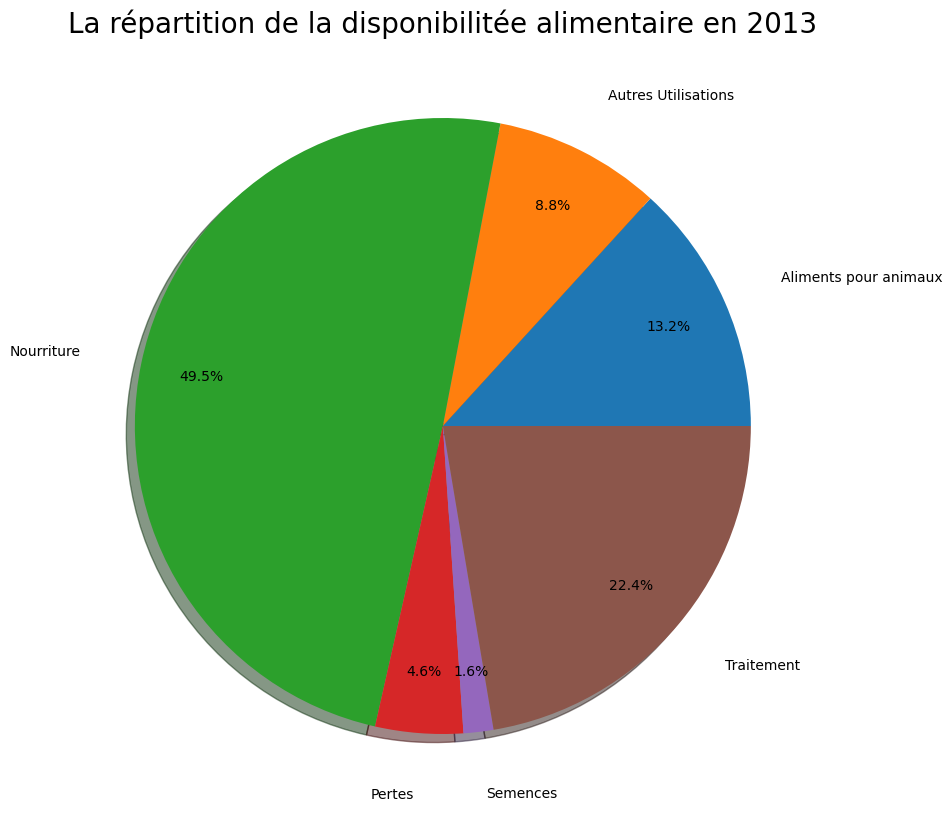

In [30]:
#On definit la taille du Pie plot
plt.figure(figsize = (10, 10))

#On regle et on affiche le Pie plot
plt.pie(x = df_pie.head(6), labels=['Aliments pour animaux', 'Autres Utilisations', 'Nourriture', 'Pertes', 'Semences', 'Traitement'],
           explode = [0, 0, 0, 0, 0, 0],
           autopct = lambda x: str(round(x, 1)) + '%',
           pctdistance = 0.8, labeldistance = 1.2,
           shadow = True)
plt.title('La répartition de la disponibilitée alimentaire en 2013',size = 20);

# 3. Les demandes de Julien
## 3.1 L'utilisation des céréales

#### 3.1.1 Explications des différentes céreales en 2013 et 2017
#### Pour 2013 : Céréales = 'Blé', 'Céréales, Autres', 'Maïs', 'Millet','Orge', 'Riz (Eq Blanchi)', 'Avoine', 'Sorgho', 'Seigle'.
#### Pour 2017: Céréales = 'Blé et produits','Céréales, Autres', 'Maïs et produits', 'Millet et produits','Orge et produits', 'Riz et produits', 'Avoine', 'Sorgho et produits', 'Seigle et produits'

#### 3.1.2 Calcul de l'utlisation des céréales pour animaux et pour l'alimentation humaine

In [31]:
# On définit la liste des céréales en 2017 et on fait la somme des cette liste.
# Sur cette liste on ne selectionne que les aliments pour animaux et on le divise par la disponibilité interieur des céréales.
# On fait la meme opération pour l'alimentation humaine.
# On divise la dispo intérieure de céréales de 2017 en 3 catégories : alimentation animale, alimentation humaine et autres.

liste_cereale2017 = ['Blé et produits','Céréales, Autres', 'Maïs et produits', 'Millet et produits','Orge et produits', 'Riz et produits', 'Avoine', 'Sorgho et produits', 'Seigle et produits']
df_cereale2017 = df_dispo_alim[df_dispo_alim["Produit"].isin(liste_cereale2017)].sum()
prop_list2017 = [df_cereale2017['Aliments pour animaux'].sum() / df_cereale2017["Disponibilité intérieure"].sum(),
                 df_cereale2017['Nourriture'].sum() / df_cereale2017["Disponibilité intérieure"].sum()]
prop_list2017.append(1-prop_list2017[0]-prop_list2017[1])


In [32]:
#On affiche les resultats de 2017
prop_list2017

[0.6933506248526291, 0.18130550970683015, 0.12534386544054074]

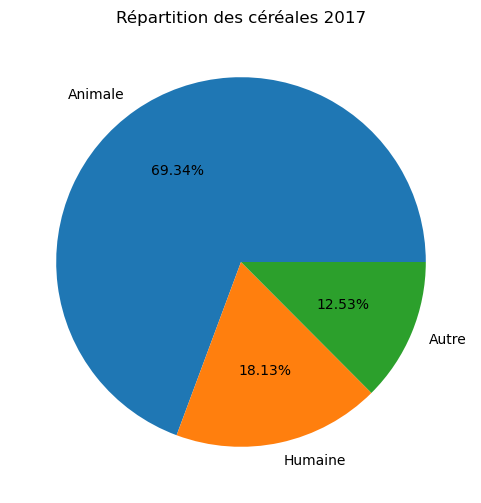

In [33]:
#On regle la taille du pie plot
plt.figure(figsize = (6, 6))
#On affiche le pie plot 
plt.pie(prop_list2017, labels = [ 'Animale','Humaine', 'Autre'],autopct = lambda x: str(round(x, 2)) + '%')
plt.title('Répartition des céréales 2017');

In [34]:
#Dispo cereale 2013

liste_cereale2013 = ['Blé','Céréales, Autres', 'Maïs', 'Millet','Orge', 'Riz (Eq Blanchi)', 'Avoine', 'Sorgho', 'Seigle']
df_cereale2013 = df_dispo_alim[df_dispo_alim["Produit"].isin(liste_cereale2013)].sum()
prop_list2013 = [df_cereale2013['Aliments pour animaux'].sum() / df_cereale2013["Disponibilité intérieure"].sum(),
                 df_cereale2013['Nourriture'].sum() / df_cereale2013["Disponibilité intérieure"].sum()]
prop_list2013.append(1-prop_list2013[0]-prop_list2013[1])

In [35]:
#On affiche les resultats de 2013
prop_list2013

[0.36291456706047653, 0.4275074480712289, 0.20957798486829454]

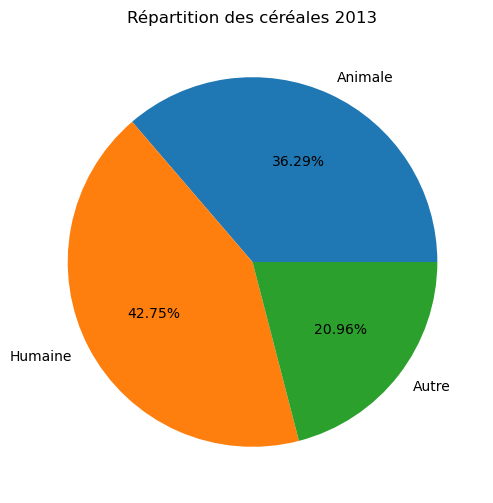

In [36]:
#On regle la taille du pie plot
plt.figure(figsize = (6, 6))
#On affiche le pie plot 
plt.pie(prop_list2013, labels = [ 'Animale','Humaine', 'Autre'],autopct = lambda x: str(round(x, 2)) + '%')
plt.title('Répartition des céréales 2013');

## 3.2 L'utilisation du Manioc en Thailande.
### 3.2.1 Pourcentage de l'exportation du Manioc au rapport de la production.

In [37]:
#On crée la variable "exportation_manioc" qui correspond à aux données de la Thailande sur le produit 'manioc'
exportation_manioc = df_dispo_alim.loc[(df_dispo_alim['Produit'] == "Manioc") & (df_dispo_alim['Zone'] == "Thaïlande"),:]

In [38]:
#On affiche les données concernant le manioc en Thailande
exportation_manioc

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Semences,Traitement,Variation de stock,Année_x,Valeur_x,Kcal/jour/population,Année_y,Valeur_y,Année,Valeur
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,...,NaN,0.0,0.0,2017.0,69209.81,2768392.4,2017.0,69209.81,2017.0,69209.81


In [39]:
#On affiche la proportion exportée à partir de la production
print("La proportion de manioc exportée est de:", "{:.2f}".format(exportation_manioc['Exportations - Quantité'].iloc[0]*100 /exportation_manioc['Production'].iloc[0]), "%")

La proportion de manioc exportée est de: 83.41 %


### 3.2.2 Exportation du Manioc et sous nutrition dans le pays.

In [40]:
exportation_manioc

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Semences,Traitement,Variation de stock,Année_x,Valeur_x,Kcal/jour/population,Année_y,Valeur_y,Année,Valeur
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,...,NaN,0.0,0.0,2017.0,69209.81,2768392.4,2017.0,69209.81,2017.0,69209.81


In [41]:
# On ajoute la colonne population de la Thailande en 2017.

In [47]:
exportation_manioc = pd.merge(exportation_manioc, df_pop , how='left', on='Zone')
exportation_manioc = exportation_manioc.loc[exportation_manioc['Année']==2017]

In [48]:
exportation_manioc

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,Valeur_x,Kcal/jour/population,Année_y,Valeur_y,Année_x,Valeur_x,Année_y,Valeur_y,Année,Valeur
4,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,...,69209.81,2768392.4,2017.0,69209.81,2017.0,69209.81,2013,68144.518,2017,69209.81
10,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,...,69209.81,2768392.4,2017.0,69209.81,2017.0,69209.81,2014,68438.746,2017,69209.81
16,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,...,69209.81,2768392.4,2017.0,69209.81,2017.0,69209.81,2015,68714.511,2017,69209.81
22,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,...,69209.81,2768392.4,2017.0,69209.81,2017.0,69209.81,2016,68971.308,2017,69209.81
28,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,...,69209.81,2768392.4,2017.0,69209.81,2017.0,69209.81,2017,69209.810,2017,69209.81
34,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,...,69209.81,2768392.4,2017.0,69209.81,2017.0,69209.81,2018,69428.453,2017,69209.81


In [49]:
# On multiplie la colonne population par 1000 pour etre en millions d'habitant
exportation_manioc['Valeur'] = exportation_manioc['Valeur'].apply(lambda x: x*1000)

#### 1kg de manioc = 1250 à 1400kcal, je choisis de prendre la valeur la plus basse pour la suite

#### source: https://devsante.org/articles/le-manioc#:~:text=Il%20a%20une%20forte%20teneur,de%20manioc%20frais%20et%20pel%C3%A9.

#### Production x 1000000 = production en kilo, x1250(kcal pour 1 kilo) / 2500(kcal theorique par personne par jour) /365 (nombre de jours dans une année)

In [50]:
#On affiche le nombre theorique de personnes qui pourraient etre nourries avec l'exportation de manioc en Thailande

print("Le nombre d'habitants qui pourraient etre nourries avec l'exportation de manioc en Thailande est:","{:.2f}".format(exportation_manioc['Exportations - Quantité'].iloc[0]*1250 /2500/365),"millions d'habitants")
print("Ce qui représente:", "{:.2f}".format(exportation_manioc['Exportations - Quantité'].iloc[0]*1000000*1250 /2500/365/exportation_manioc['Valeur'].iloc[0]*100), "% de la population de Thailande")
      

Le nombre d'habitants qui pourraient etre nourries avec l'exportation de manioc en Thailande est: 34.54 millions d'habitants
Ce qui représente: 49.91 % de la population de Thailande


# 4. Les demandes de Mélanie

### 4.1 La proportion de personnes sous-alimentées est la plus forte en 2017

#### 4.1.1 Jointure entre le fichier population et le fichier sous nutrition.

In [51]:
# On fait une jointure pour faire apparaitre les données population sur le fichier sous nutrition sur 2017.
pop_2017 = df_pop.loc[df_pop['Année']==2017]
df_sous_nut = pd.merge(df_sous_nut , pop_2017, how='left', on='Zone')
df_sous_nut.head(20)

,Zone,Année_x,Valeur_x,Année_y,Valeur_y
0,Afghanistan,2013,8.6,2017,36296.113
1,Afghanistan,2014,8.8,2017,36296.113
2,Afghanistan,2015,8.9,2017,36296.113
3,Afghanistan,2016,9.7,2017,36296.113
4,Afghanistan,2017,10.5,2017,36296.113
5,Afghanistan,2018,11.1,2017,36296.113
6,Afrique du Sud,2013,2.2,2017,57009.756
7,Afrique du Sud,2014,2.5,2017,57009.756
8,Afrique du Sud,2015,2.8,2017,57009.756
9,Afrique du Sud,2016,3.0,2017,57009.756


In [52]:
#On selectionne uniquement 2017 sur la colonne Année_x.
df_ssnut_2017 = df_sous_nut.loc[df_pop['Année'] == 2017, :]
df_ssnut_2017.head()

,Zone,Année_x,Valeur_x,Année_y,Valeur_y
4,Afghanistan,2017,10.5,2017,36296.113
10,Afrique du Sud,2017,3.1,2017,57009.756
16,Albanie,2017,0.1,2017,2884.169
22,Algérie,2017,1.3,2017,41389.189
28,Allemagne,2017,0.0,2017,82658.409


#### 4.1.2 Calcul du pourcentage de sous nutrition par pays.

In [53]:
# On crée une colonne permettant de calculer la disponibilité alimentaire journalière pour la population de chaque pays

df_ssnut_2017['prop_sous_nut'] = df_ssnut_2017['Valeur_x'] / df_ssnut_2017['Valeur_y'] * 100

In [54]:
# On calcul multiplie le resultat par 1000 car la population est en milliers afin que le resultat soit cohérent.
# On arrondit ce resultat et on verifie en sortant les 10 premières lignes du DataFrame.

df_ssnut_2017['prop_sous_nut'] = (df_ssnut_2017['prop_sous_nut'].apply(lambda x: x*1000))
df_ssnut_2017['prop_sous_nut'] = round((df_ssnut_2017['prop_sous_nut']),2)
df_ssnut_2017.head(10)

,Zone,Année_x,Valeur_x,Année_y,Valeur_y,prop_sous_nut
4,Afghanistan,2017,10.5,2017,36296.113,28.93
10,Afrique du Sud,2017,3.1,2017,57009.756,5.44
16,Albanie,2017,0.1,2017,2884.169,3.47
22,Algérie,2017,1.3,2017,41389.189,3.14
28,Allemagne,2017,0.0,2017,82658.409,0.00
34,Andorre,2017,0.0,2017,77.001,0.00
40,Angola,2017,5.8,2017,29816.766,19.45
46,Antigua-et-Barbuda,2017,0.0,2017,95.426,0.00
52,Arabie saoudite,2017,1.6,2017,33101.179,4.83
58,Argentine,2017,1.5,2017,43937.140,3.41


In [55]:
#On affiche les 10 pays avec le taux de sous-nutriton les plus élevés en 2017
df_ssnut_2017.sort_values(by = 'prop_sous_nut', ascending = False).head(10)

,Zone,Année_x,Valeur_x,Année_y,Valeur_y,prop_sous_nut
472,Haïti,2017,5.3,2017,10982.366,48.26
946,République populaire démocratique de Corée,2017,12.0,2017,25429.825,47.19
652,Madagascar,2017,10.5,2017,25570.512,41.06
622,Libéria,2017,1.8,2017,4702.226,38.28
604,Lesotho,2017,0.8,2017,2091.534,38.25
1102,Tchad,2017,5.7,2017,15016.753,37.96
970,Rwanda,2017,4.2,2017,11980.961,35.06
730,Mozambique,2017,9.4,2017,28649.018,32.81
1120,Timor-Leste,2017,0.4,2017,1243.258,32.17
4,Afghanistan,2017,10.5,2017,36296.113,28.93


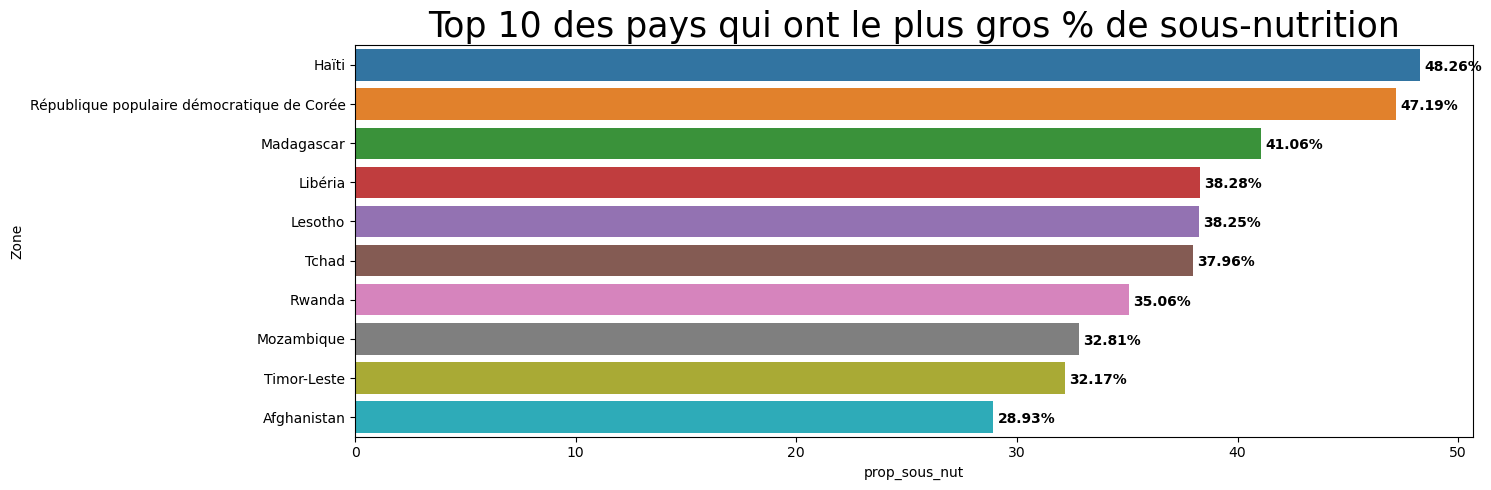

In [56]:
top_10_nutri = df_ssnut_2017.sort_values(by = 'prop_sous_nut', ascending = False).head(10)
plt.figure(figsize = (15, 5))
sns.barplot(data=top_10_nutri, x="prop_sous_nut", y=top_10_nutri.Zone)
plt.title("Top 10 des pays qui ont le plus gros % de sous-nutrition", fontsize=25)

# On ajoute le pourcentage à chaque barre
for i, v in enumerate(top_10_nutri['prop_sous_nut']):
    plt.text(v + 0.2 , i + .15, str(round(v, 2)) + '%', color='black', fontweight='bold')

plt.tight_layout()
plt.show()


### 4.2 Les pays ayant reçu le plus d'aide alimentaire

In [57]:
#On affiche df_aide
df_aide_alim.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [58]:
#On supprimme les colonne Produit et année
df_aide_recu= df_aide_alim.drop(columns=['Produit', 'Année'])

#On affiche le dataframe de façon plus lisible, en groupant par Pays et Valeur, puis en fesant la sommes des lignes groupées
df_aide_recu = df_aide_alim.groupby(['Pays bénéficiaire']).agg({'Valeur': np.sum})
df_aide_recu.head()

,Valeur
Pays bénéficiaire,
Afghanistan,185452
Algérie,81114
Angola,5014
Bangladesh,348188
Bhoutan,2666


In [59]:
#On affiche les 10 pays qui ont le plus bénéficié d'aide depuis 2013
df_aide_recu.sort_values(by = 'Valeur', ascending = False).head(10)

,Valeur
Pays bénéficiaire,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


<function matplotlib.pyplot.show(close=None, block=None)>

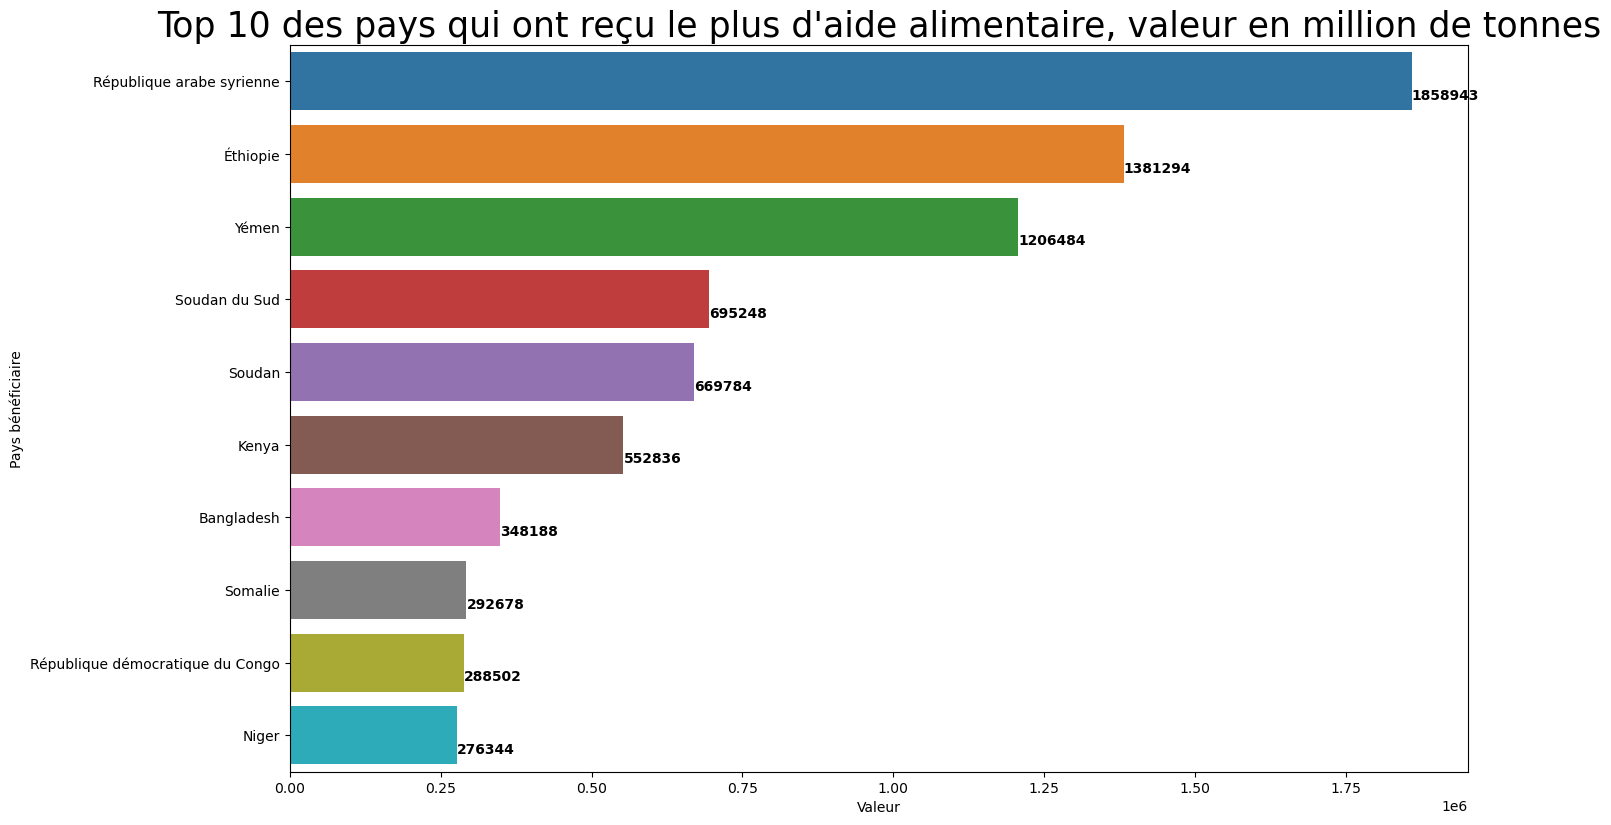

In [60]:
#On affiche un graphique avec les 10 pays qui ont reçu le plus d'aide alimentaire depuis 2013
top_10_aide = df_aide_recu.sort_values(by = 'Valeur', ascending = False)[:10]
plt.figure(figsize = (15, 8))
sns.barplot(data=top_10_aide, x="Valeur", y=top_10_aide.index)
for i, v in enumerate(top_10_aide['Valeur']):
    plt.text(v + 3 , i + .25, str(round(v, 2)), color='black', fontweight='bold')

plt.tight_layout()
plt.title("Top 10 des pays qui ont reçu le plus d'aide alimentaire, valeur en million de tonnes", fontsize = 25 )
plt.show

### 4.3 Les pays ayant le plus de disponibilité par habitant

In [61]:
#On regroupe par Zone(Pays), puis en fesant la sommes des lignes groupées dans un dataframe appelé top_dispo
top_dispo = df_dispo_alim.groupby(['Zone']).agg({
'Aliments pour animaux': np.sum,'Autres Utilisations': np.sum,'Disponibilité alimentaire (Kcal/personne/jour)': np.sum,
'Disponibilité alimentaire en quantité (kg/personne/an)': np.sum,'Disponibilité de matière grasse en quantité (g/personne/jour)': np.sum,
'Disponibilité de protéines en quantité (g/personne/jour)': np.sum,'Disponibilité intérieure': np.sum,
'Exportations - Quantité': np.sum,'Importations - Quantité': np.sum,'Nourriture': np.sum,'Pertes': np.sum,'Production': np.sum,'Semences': np.sum,
'Traitement': np.sum,'Variation de stock': np.sum})
#On rajoute un index à top_dispo
top_dispo = top_dispo.reset_index()

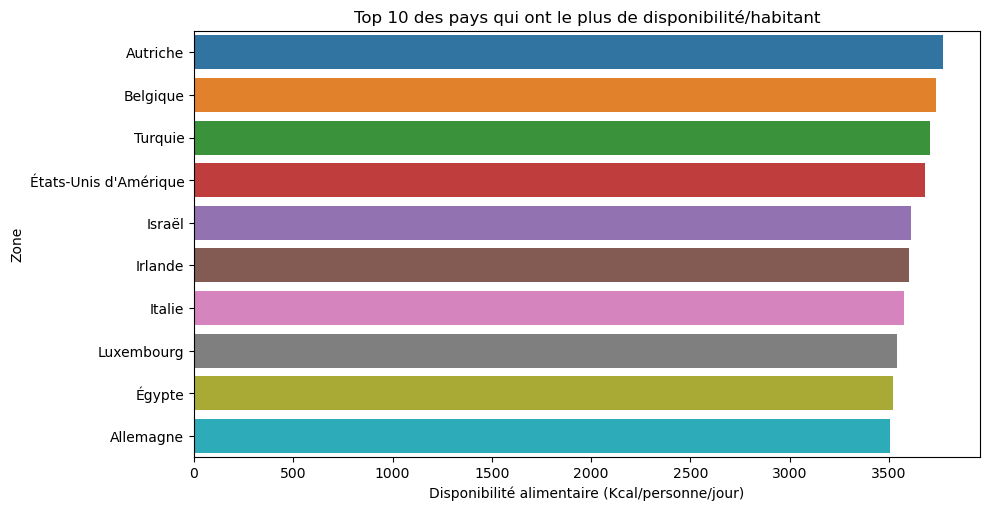

In [62]:
#On affiche les 10 pays qui ont le plus de disponibilité alimentaire/habitant sur un graphique
top_10_dispo = top_dispo.sort_values(by = 'Disponibilité alimentaire (Kcal/personne/jour)', ascending = False)[:10]
plt.figure(figsize = (10, 5))
sns.barplot(data=top_10_dispo, x="Disponibilité alimentaire (Kcal/personne/jour)", y=top_10_dispo.Zone)
plt.tight_layout()
plt.title("Top 10 des pays qui ont le plus de disponibilité/habitant")
plt.show()

### 4.4 Les pays ayant le moins de disponibilité par habitant

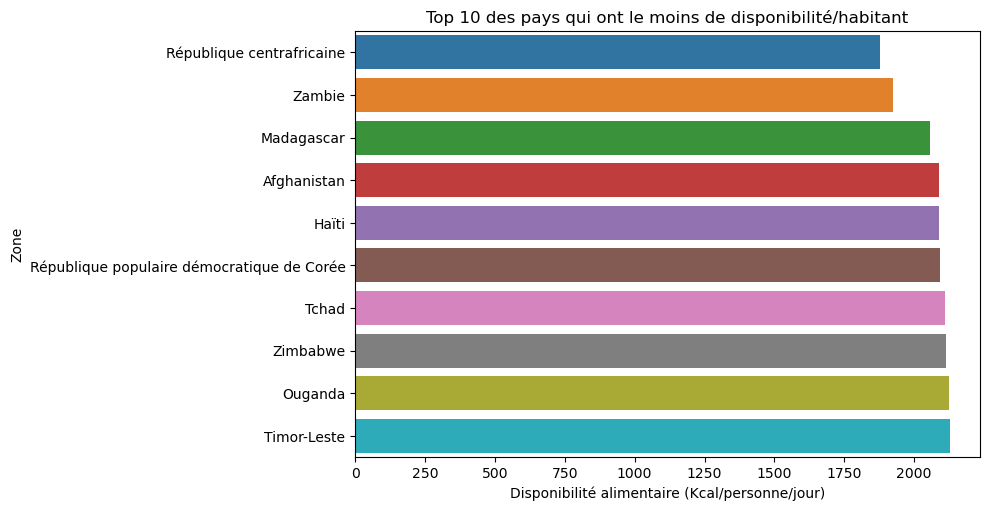

In [63]:
#On affiche les 10 pays qui ont le moins de disponibilité alimentaire/habitant sur un graphique
bottom_10_dispo = top_dispo.sort_values(by = 'Disponibilité alimentaire (Kcal/personne/jour)', ascending = True)[:10]
plt.figure(figsize = (10, 5))
sns.barplot(data=bottom_10_dispo, x="Disponibilité alimentaire (Kcal/personne/jour)", y=bottom_10_dispo.Zone)
plt.tight_layout()
plt.title("Top 10 des pays qui ont le moins de disponibilité/habitant")
plt.show()

### 4.5 Etudes complémentaires

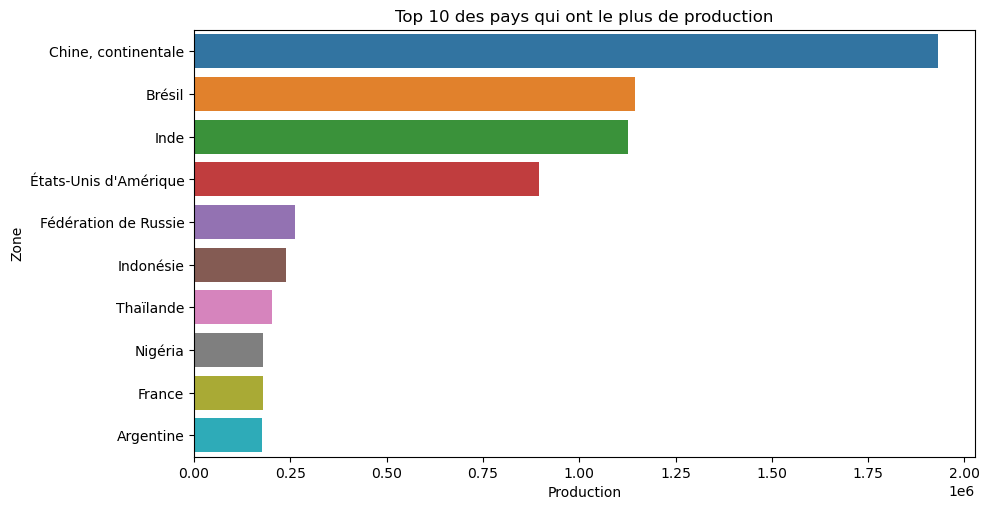

In [64]:
#On affiche les 10 pays qui produisent le plus sur un graphique
top_10_prod = top_dispo.sort_values(by = 'Production', ascending = False)[:10]
plt.figure(figsize = (10, 5))
sns.barplot(data=top_10_prod, x="Production", y=top_10_prod.Zone)
plt.tight_layout()
plt.title("Top 10 des pays qui ont le plus de production")
plt.show()

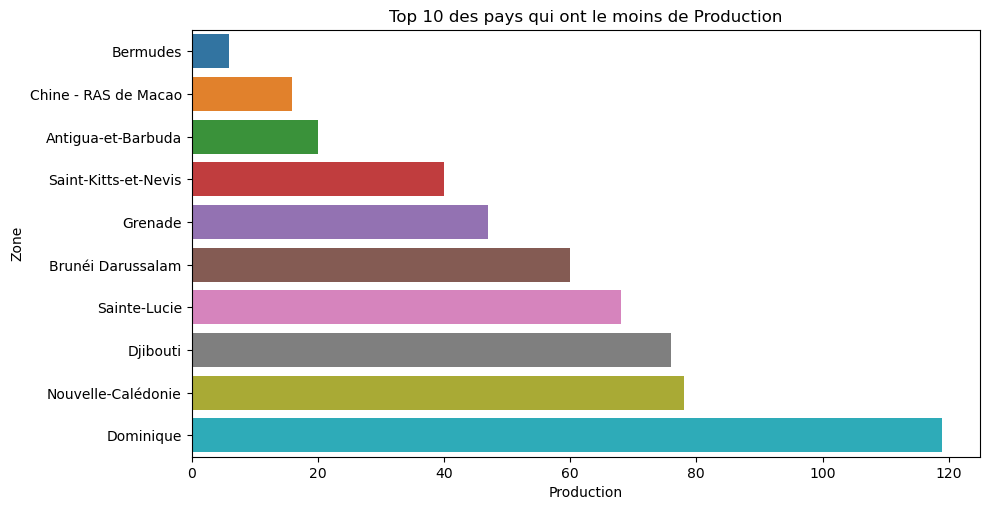

In [65]:
#On affiche les 10 pays avec le moins de production sur un graphique
bottom_10_prod = top_dispo.sort_values(by = 'Production', ascending = True)[:10]
plt.figure(figsize = (10, 5))
sns.barplot(data=bottom_10_prod, x="Production", y=bottom_10_prod.Zone)
plt.tight_layout()
plt.title("Top 10 des pays qui ont le moins de Production")
plt.show()

Sur les 10 pays en sous-nutriton , 6 font partis des pays avec le moins de disponibilité/habitants


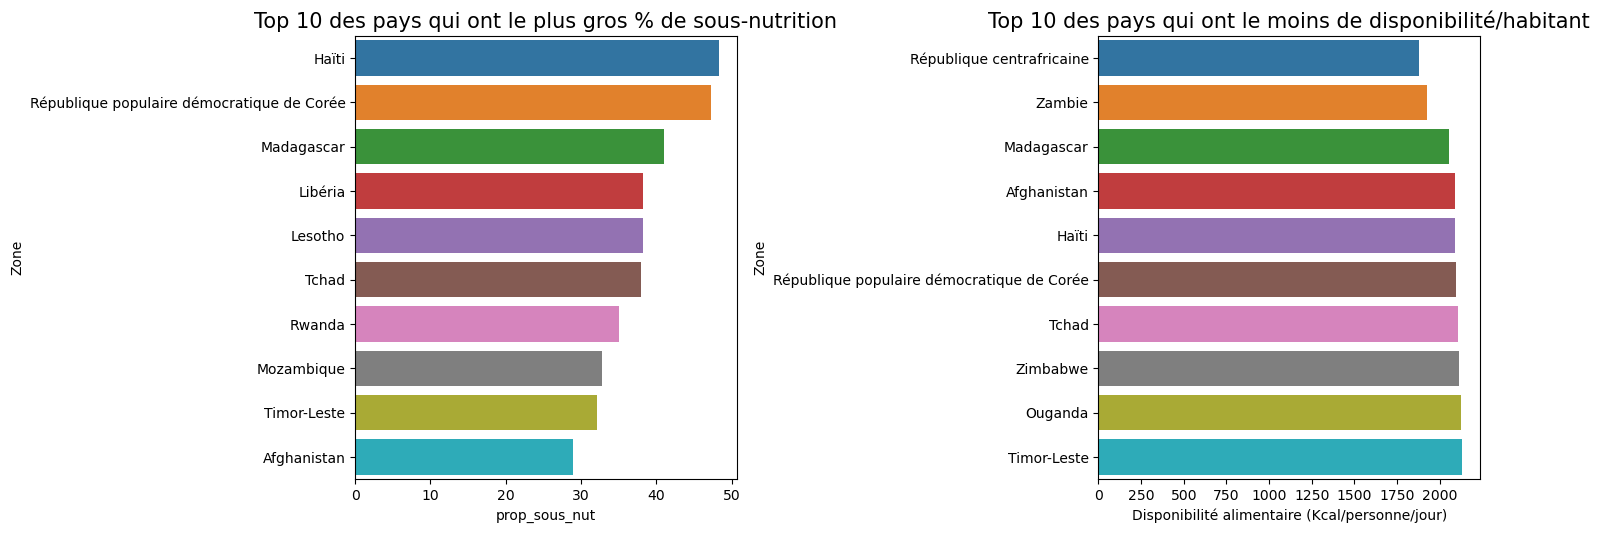

In [66]:
#On compare deux graphiques

fig = plt.figure(figsize=(15,10))

plt.subplot(221)
sns.barplot(data=top_10_nutri, x="prop_sous_nut", y=top_10_nutri.Zone)
plt.title("Top 10 des pays qui ont le plus gros % de sous-nutrition", fontsize=15)
plt.tight_layout()


plt.subplot(222)
sns.barplot(data=bottom_10_dispo, x="Disponibilité alimentaire (Kcal/personne/jour)", y=bottom_10_dispo.Zone)
plt.tight_layout()
plt.title("Top 10 des pays qui ont le moins de disponibilité/habitant", fontsize=15)

print("Sur les 10 pays en sous-nutriton , 6 font partis des pays avec le moins de disponibilité/habitants")

Sur les 10 pays qui ont le moins de production, aucun ne fait parti des 10 pays qui reçoivent le plus d'aide alimentaire depuis 2013 


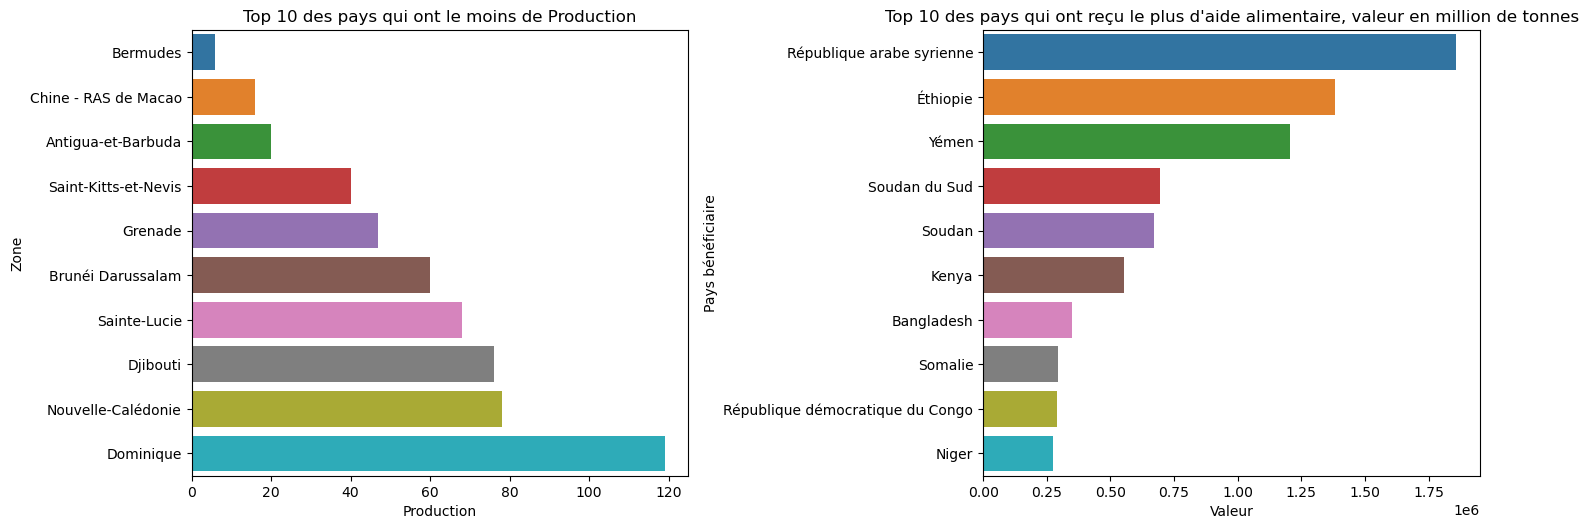

In [67]:
#On compare deux graphique

fig = plt.figure(figsize=(15,10))

plt.subplot(221)
sns.barplot(data=bottom_10_prod, x="Production", y=bottom_10_prod.Zone)
plt.tight_layout()
plt.title("Top 10 des pays qui ont le moins de Production")


plt.subplot(222)
sns.barplot(data=top_10_aide, x="Valeur", y=top_10_aide.index)
plt.tight_layout()
plt.title("Top 10 des pays qui ont reçu le plus d'aide alimentaire, valeur en million de tonnes")

print("Sur les 10 pays qui ont le moins de production, aucun ne fait parti des 10 pays qui reçoivent le plus d'aide alimentaire depuis 2013 ")

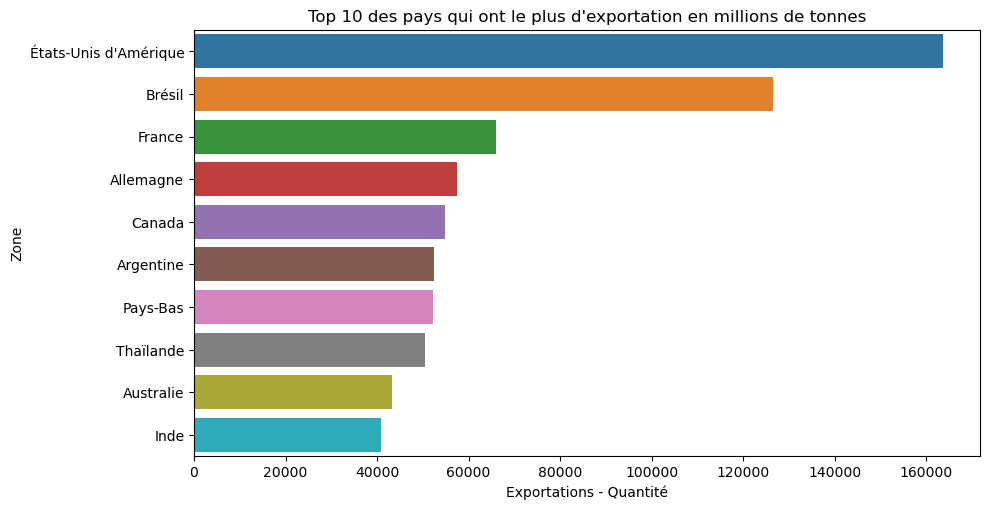

In [68]:
#On affiche les 10 pays qui exportent le plus sur un graphique
top_10_expor = top_dispo.sort_values(by = 'Exportations - Quantité', ascending = False)[:10]
plt.figure(figsize = (10, 5))
sns.barplot(data=top_10_expor, x="Exportations - Quantité", y=top_10_expor.Zone)
plt.tight_layout()
plt.title("Top 10 des pays qui ont le plus d'exportation en millions de tonnes")
plt.show()

Parmi les 10 pays qui ont le taux le plus important de sous-nutrition, aucun ne fait parti des 10 pays qui reçoient le plus d'aide alimentaire depuis 2013 


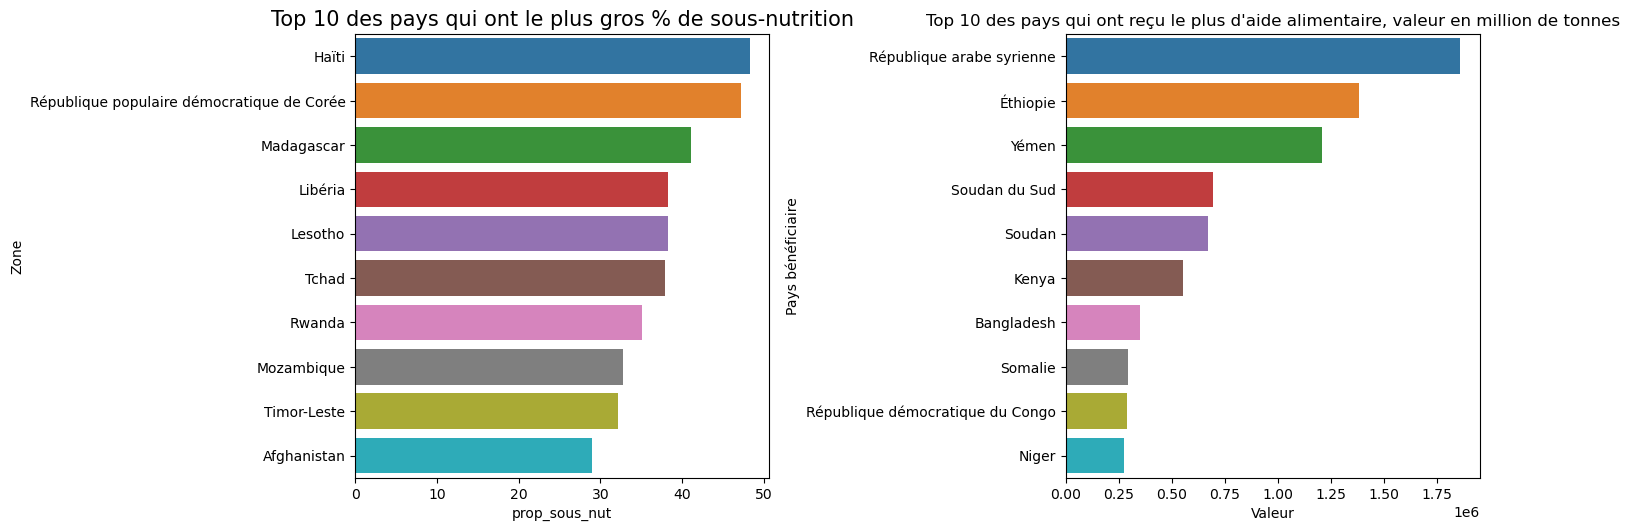

In [69]:
#On compare deux graphique

fig = plt.figure(figsize=(15,10))

plt.subplot(221)
sns.barplot(data=top_10_nutri, x="prop_sous_nut", y=top_10_nutri.Zone)
plt.title("Top 10 des pays qui ont le plus gros % de sous-nutrition", fontsize=15)
plt.tight_layout()


plt.subplot(222)
sns.barplot(data=top_10_aide, x="Valeur", y=top_10_aide.index)
plt.tight_layout()
plt.title("Top 10 des pays qui ont reçu le plus d'aide alimentaire, valeur en million de tonnes")

print("Parmi les 10 pays qui ont le taux le plus important de sous-nutrition, aucun ne fait parti des 10 pays qui reçoient le plus d'aide alimentaire depuis 2013 ")